In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
trainData = np.genfromtxt('trainData.csv',delimiter=',',skip_header=1)
testData = np.genfromtxt('testData.csv',delimiter=',',skip_header=1)

In [4]:
x_train = trainData[:,:2]
y_train = trainData[:,2]
x_test = testData[:,:2]
y_test = testData[:,2]

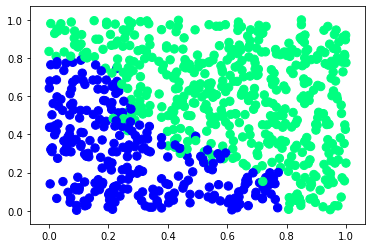

In [5]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=70,cmap='winter')

In [33]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf',C=10000,gamma='scale')

In [34]:
clf.fit(x_train,y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
np.sum(clf.predict(x_test)==y_test)/len(y_test)

0.9437751004016064

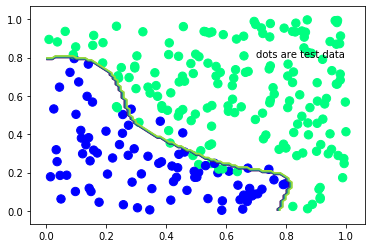

In [36]:
h = .01
x_min = 0
x_max = 1
y_min = 0
y_max = 1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.contour(xx,yy,z)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,s=70,cmap='winter')
plt.text(.7,.8,'dots are test data')
plt.show()

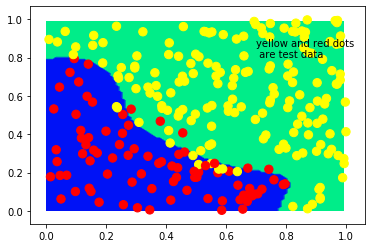

In [37]:
plt.contourf(xx,yy,z,cmap='winter')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,s=70,cmap='autumn')
plt.text(.7,.8,'yellow and red dots \n are test data')
plt.show()